In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
df=pd.read_csv("/content/data.csv")
print(df.head())
df["poutcome"]=df["poutcome"].astype("category").cat.codes
print(df)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


In [ ]:
pip install ucimlrepo

In [ ]:
train=df.drop(columns=["y"])
target=df["y"]
cat_col=train.select_dtypes(include=['object']).columns

In [ ]:
label_encoders = {}
for col in cat_col:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col])
    label_encoders[col]=le

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,target,test_size=0.3,random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8737835446770864
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11966
         yes       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



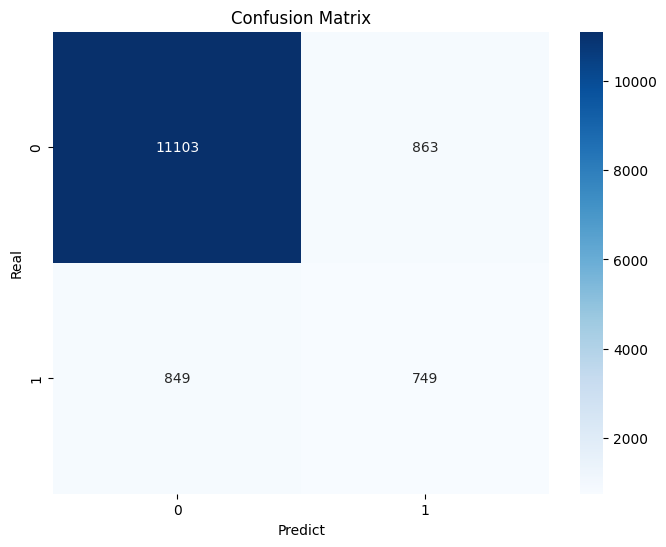

In [ ]:
x_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(x_matrix,annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

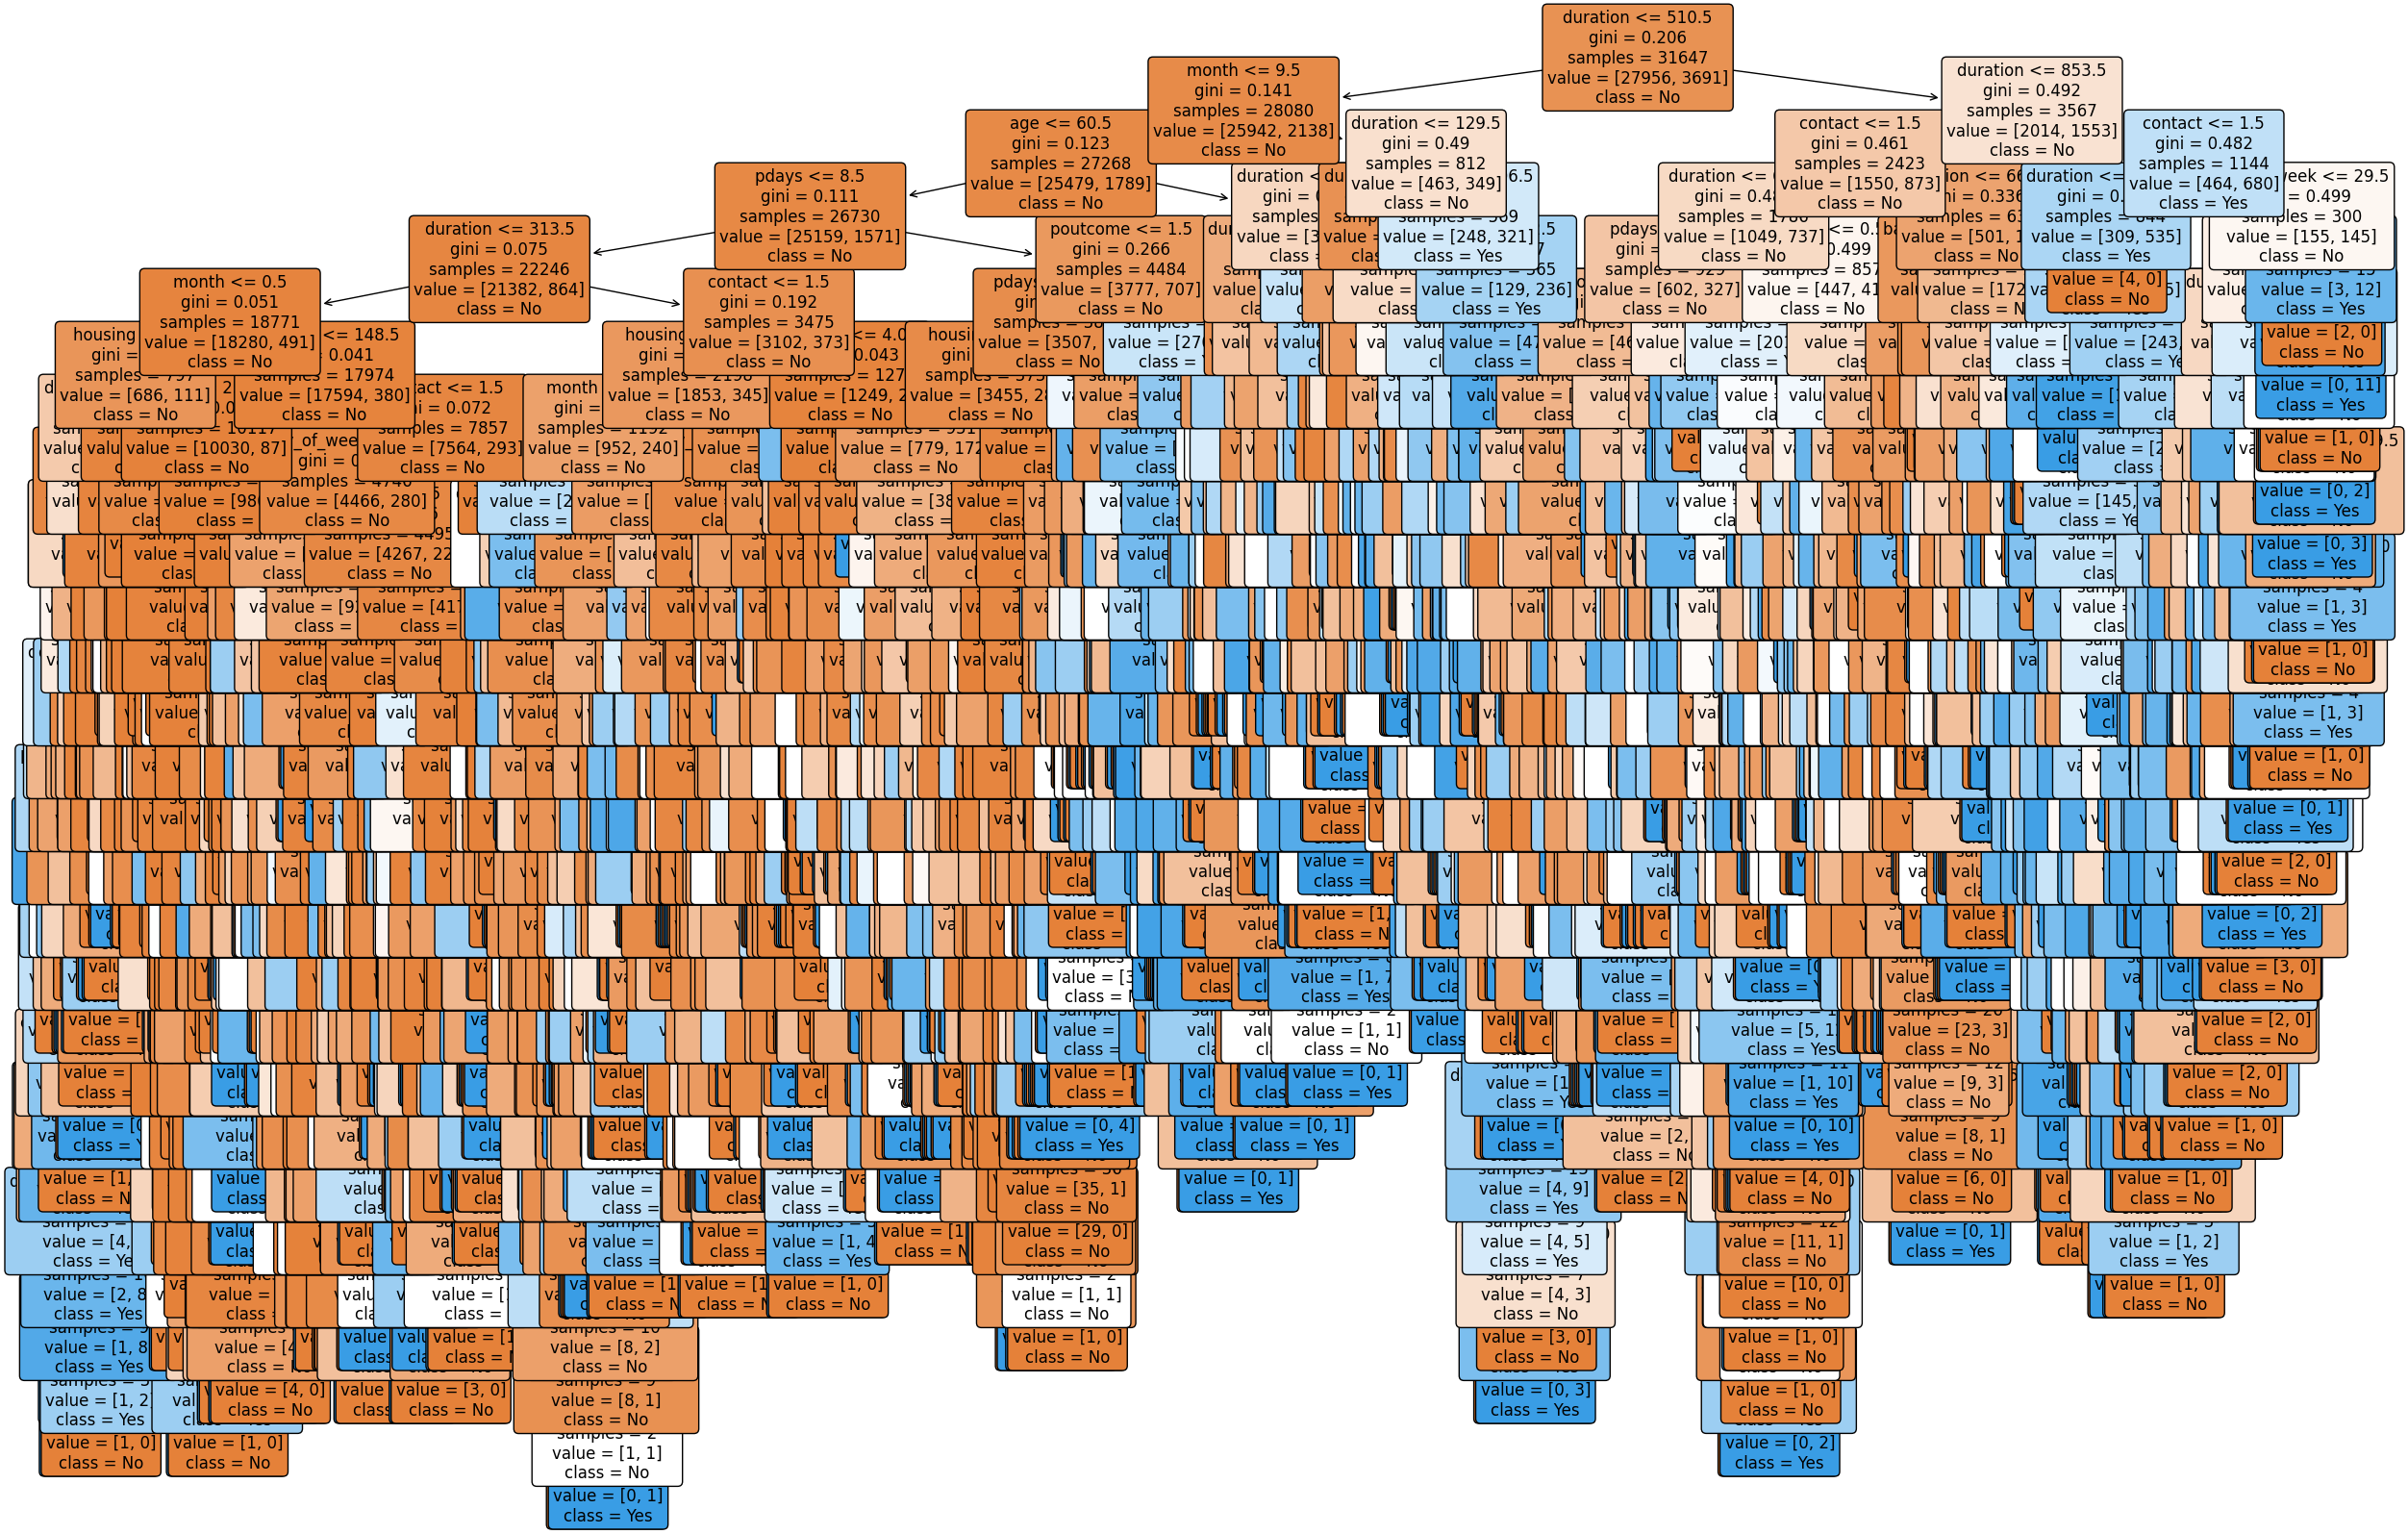

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(model,feature_names=df.drop(columns=["y"]).columns,class_names=['No','Yes'], filled=True,rounded=True,fontsize=12)
plt.show()